 # Курсовая работа

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data = pd.DataFrame({
    'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Production': [22811, 23084, 23113, 23347, 23710, 24293, 24685, 25058, 25472, 25750, 26368, 27070, 28411, 29281]
})

In [3]:
data.head()

,Year,Production
0,2010,22811
1,2011,23084
2,2012,23113
3,2013,23347
4,2014,23710


In [5]:
sum_by_year = data.groupby('Year')['Production'].sum()
print(sum_by_year)

Year
2010    22811
2011    23084
2012    23113
2013    23347
2014    23710
2015    24293
2016    24685
2017    25058
2018    25472
2019    25750
2020    26368
2021    27070
2022    28411
2023    29281
Name: Production, dtype: int64


In [6]:
absolute_dynamics = sum_by_year.diff().fillna(0)
print(absolute_dynamics)

Year
2010       0.0
2011     273.0
2012      29.0
2013     234.0
2014     363.0
2015     583.0
2016     392.0
2017     373.0
2018     414.0
2019     278.0
2020     618.0
2021     702.0
2022    1341.0
2023     870.0
Name: Production, dtype: float64


In [7]:
growth_rate = (sum_by_year / sum_by_year.shift(1)).fillna(0) * 100
print(growth_rate)

Year
2010      0.000000
2011    101.196791
2012    100.125628
2013    101.012417
2014    101.554804
2015    102.458878
2016    101.613634
2017    101.511039
2018    101.652167
2019    101.091394
2020    102.400000
2021    102.662318
2022    104.953823
2023    103.062194
Name: Production, dtype: float64


In [8]:
increment_rate = (absolute_dynamics / sum_by_year.shift(1)).fillna(0) * 100
print(increment_rate)

Year
2010    0.000000
2011    1.196791
2012    0.125628
2013    1.012417
2014    1.554804
2015    2.458878
2016    1.613634
2017    1.511039
2018    1.652167
2019    1.091394
2020    2.400000
2021    2.662318
2022    4.953823
2023    3.062194
Name: Production, dtype: float64


In [9]:
geometric_mean = sum_by_year.mean()

absolute_dynamics_mean = absolute_dynamics.mean()

growth_rate_mean = growth_rate.mean()

increment_rate_mean = increment_rate.mean()

# Выводим результаты
print(f"Средняя геометрическая: {geometric_mean}")
print(f"Средняя абсолютная динамика: {absolute_dynamics_mean}")
print(f"Средний темп роста: {growth_rate_mean}%")
print(f"Средний темп прироста: {increment_rate_mean}%")

Средняя геометрическая: 25175.214285714286
Средняя абсолютная динамика: 462.14285714285717
Средний темп роста: 94.66393484567736%
Средний темп прироста: 1.8067919885345094%


In [10]:
years = set(data['Year'])
sorted(years)


[2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023]

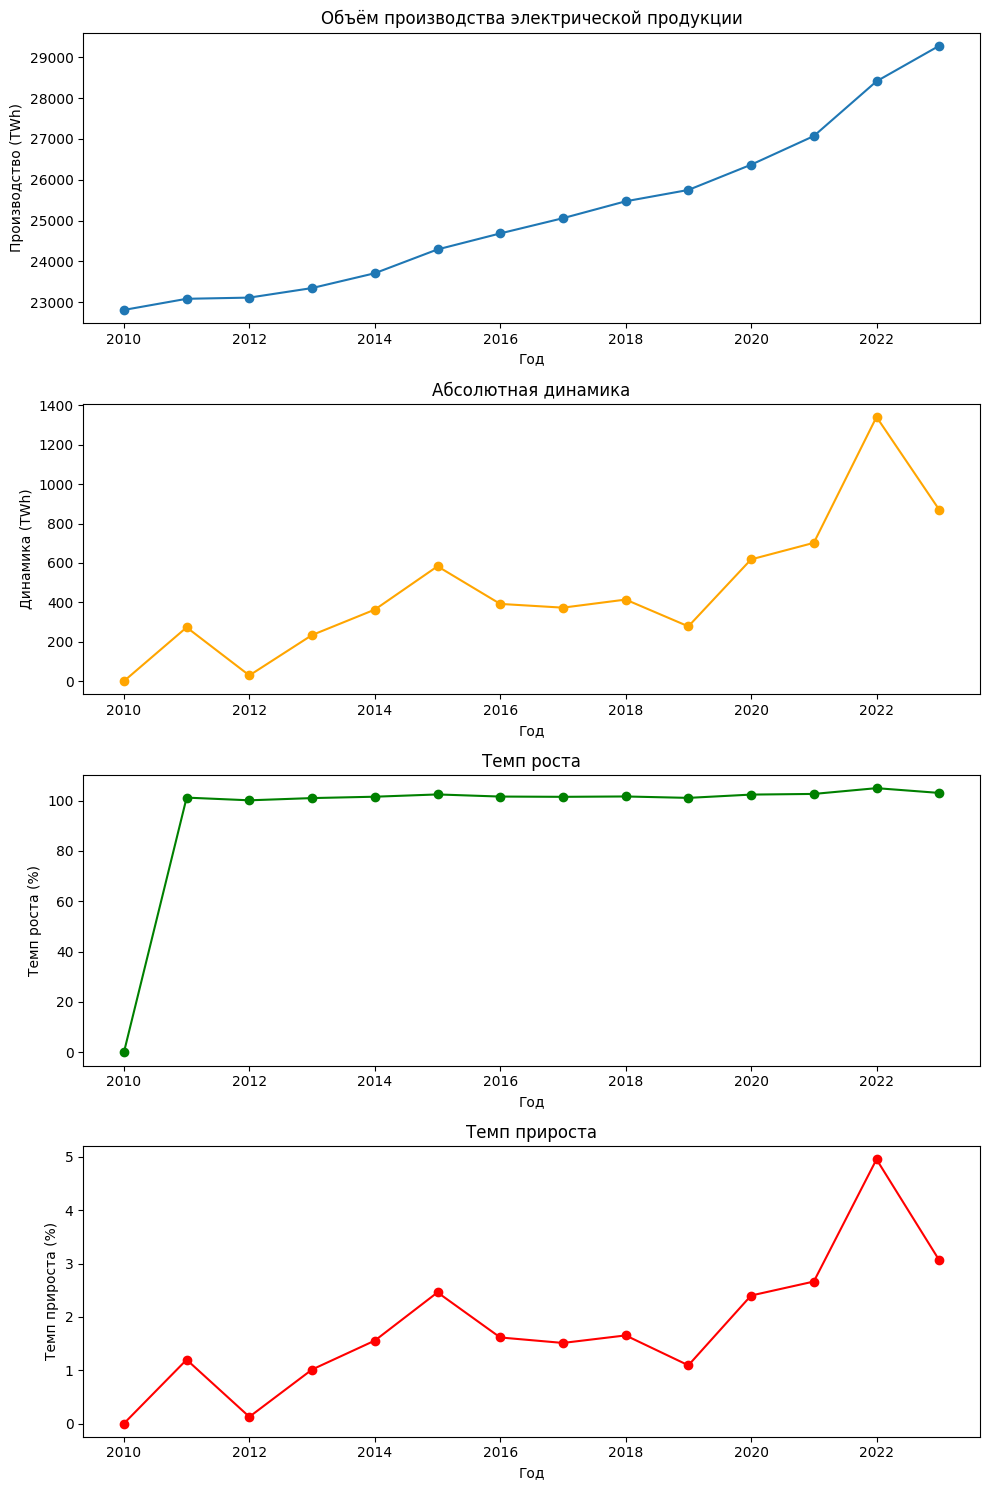

In [11]:
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

# График объёма производства по годам
axs[0].plot(data['Year'], sum_by_year, marker='o')
axs[0].set_title('Объём производства электрической продукции')
axs[0].set_xlabel('Год')
axs[0].set_ylabel('Производство (TWh)')

# График абсолютной динамики
axs[1].plot(data['Year'], absolute_dynamics, marker='o', color='orange')
axs[1].set_title('Абсолютная динамика')
axs[1].set_xlabel('Год')
axs[1].set_ylabel('Динамика (TWh)')

# График темпа роста
axs[2].plot(data['Year'], growth_rate, marker='o', color='green')
axs[2].set_title('Темп роста')
axs[2].set_xlabel('Год')
axs[2].set_ylabel('Темп роста (%)')

# График темпа прироста
axs[3].plot(data['Year'], increment_rate, marker='o', color='red')
axs[3].set_title('Темп прироста')
axs[3].set_xlabel('Год')
axs[3].set_ylabel('Темп прироста (%)')

# Отображаем графики
plt.tight_layout()
plt.show()

In [12]:
# Тест Шапиро-Уилка для проверки нормальности распределения данных
shapiro_test = stats.shapiro(data['Production'])
print(f"Shapiro-Wilk test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}")

if shapiro_test[1] < 0.05:
    print("Гипотеза о нормальности распределения отвергнута.")
else:
    print("Нет оснований отвергать гипотезу о нормальности распределения.")

Shapiro-Wilk test statistic: 0.9238602305783679, p-value: 0.24977987130863305
Нет оснований отвергать гипотезу о нормальности распределения.


In [14]:
chi2_stat, p_val = stats.normaltest(data['Production'])
print(f'Chi-squared statistic: {chi2_stat}')
print(f'P-value: {p_val}')

# Интерпретация результата
alpha = 0.05  # Уровень значимости
if p_val < alpha:
    print('Данные не следуют нормальному распределению (отвергаем H0)')
else:
    print('Нет оснований отвергать H0 о нормальности распределения данных')


Chi-squared statistic: 1.6974008197366357
P-value: 0.4279707572707434
Нет оснований отвергать H0 о нормальности распределения данных


c:\Users\иван\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=14 observations were given.
  return hypotest_fun_in(*args, **kwds)


   Year  Production
0  2010       22811
1  2011       23084
2  2012       23113
3  2013       23347
4  2014       23710


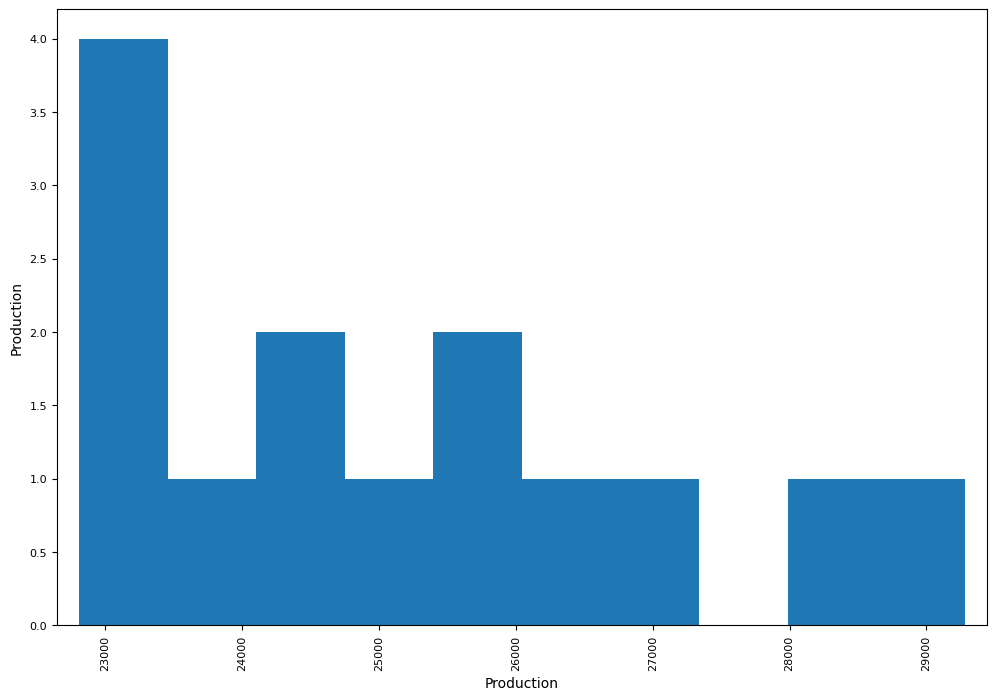

In [15]:

# Построение корреляционного поля
print(data.head())
pd.plotting.scatter_matrix(data[['Production']], alpha=0.8, figsize=(12, 8))
plt.show()

In [16]:
import statsmodels.api as sm

# Зависимая переменная (Y) - объём производства
Y = data['Production']

# Независимая переменная (X) - Годы
X = data['Year']

# Добавляем константу для свободного члена
X = sm.add_constant(X)

# Построение модели линейной регрессии
model = sm.OLS(Y, X).fit()

# Вывод результатов модели
print(model.summary())

# Параметрическая идентификация
print(model.pvalues)

# Тест Шапиро-Уилка на нормальность остатков
shapiro_test = stats.shapiro(model.resid)
print(f"Shapiro-Wilk test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}")

                            OLS Regression Results                            
Dep. Variable:             Production   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     178.5
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           1.45e-08
Time:                        03:38:20   Log-Likelihood:                -106.60
No. Observations:                  14   AIC:                             217.2
Df Residuals:                      12   BIC:                             218.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.214e+05   7.08e+04    -13.005      0.0

c:\Users\иван\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=14 observations were given.
  return hypotest_fun_in(*args, **kwds)


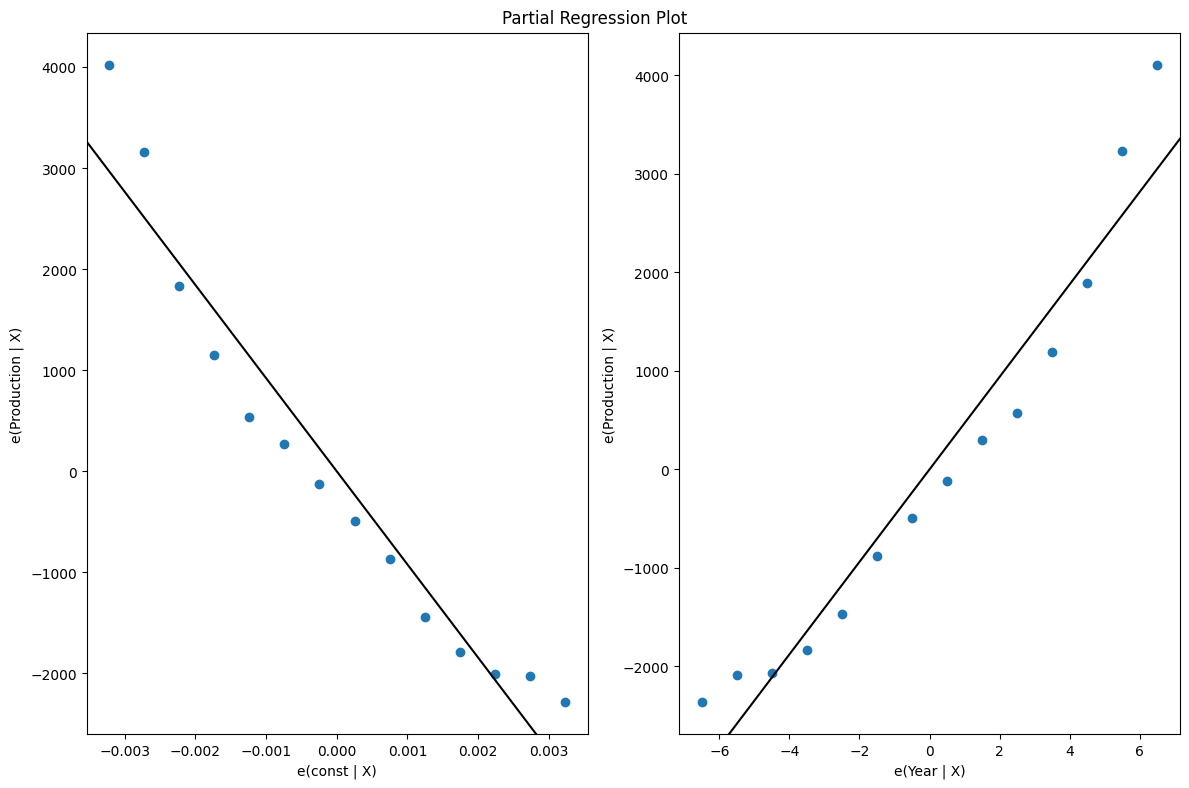

In [17]:
# Графики частичных регрессий
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)
plt.show()

In [20]:
# Прогноз на 2023 год по среднему абсолютному приросту
mean_absolute_growth = absolute_dynamics.mean()
forecast_2024 = sum_by_year.iloc[-1] + mean_absolute_growth
print(f"Прогноз объёма производства на 2024 год: {forecast_2024:.2f} TWh")

print(f"Фактическое значение Production для 2024 года: {29281}")

# Фактическое значение для сравнения (примерное)
actual_2024 = 29281  # Это значение нужно заменить фактическими данными
relative_error = abs(forecast_2024 - actual_2024) / actual_2024
print(f"Относительная погрешность прогноза: {relative_error:.2%}")

Прогноз объёма производства на 2024 год: 29743.14 TWh
Фактическое значение Production для 2024 года: 29281
Относительная погрешность прогноза: 1.58%
